# Social Network Analysis Homework

### Scenario 

You are working in the marketing department or at Marketing Agency, and your goal is to detect 
the most important guys to target them. Considering the budget is limited, you should help the 
marketing specialist to decide whom to target.

In [1]:
# importing libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import itertools
from infomap import Infomap
import operator
from collections import Counter
from copy import deepcopy

In [2]:
# Reading data
data = pd.read_csv("connections.txt")
data.head()

,0 1
0,0 2
1,0 3
2,0 4
3,0 5
4,0 6


#### 1. Create a Directed graph 

In [3]:
# Reading data and assigning column names
data = pd.read_csv('connections.txt', delimiter=' ', names=['from', 'to'])

# Creating a directed graph
graph = nx.DiGraph()
graph.add_edges_from(data.to_numpy())
data.head()

,from,to
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


#### 2. Show which nodes are bridges. 

In [4]:
# Find bridges in the undirected version of the graph
bridges = nx.bridges(graph.to_undirected())

# Extract the bridge edges from the set of bridges
bridge_edges = list(bridges)
merged = list(itertools.chain(*bridge_edges))

# Create a set of unique bridge nodes
bridge_nodes = set(merged)

print('Bridges: ', bridge_nodes)

Bridges:  {0, 2569, 11, 12, 15, 18, 1560, 2079, 2596, 37, 550, 43, 1581, 3650, 1096, 585, 74, 602, 1119, 607, 608, 613, 107, 3183, 624, 114, 1145, 3709, 638, 3729, 2195, 1684, 668, 3230, 674, 3748, 686, 692, 1206, 698, 209, 210, 3798, 215, 2269, 3820, 3853, 3856, 2842, 287, 801, 292, 1834, 335, 348, 3935, 358, 1386, 875, 3437, 883, 1912, 3451, 891, 3453, 892, 3974, 3980, 911, 3984, 918, 2457, 414, 2470, 4008, 4010, 4015, 4022, 4024, 1466, 447, 4035, 3031, 3570, 3071}


#### 3. Show the density of the graph. Comment about your findings

In [6]:
# Calculate the density of the graph using NetworkX
density = nx.density(graph)
print('Density is:', density)

Density is: 0.0054099817517196435


Density is relatively close to 0, which suggests that there are few connections among individuals in the network. This means that the target audience is not tightly interconnected and each individual has limited direct connections with others.

#### 4. Show which nodes have the highest and lowest number of connections. 

In [7]:
# Calculating the degree for each node
node_degrees = dict(graph.degree())

# Finding top 10 nodes with the highest connections
highest_connected_nodes = sorted(node_degrees, key=node_degrees.get, reverse=True)[:10]

# Finding top 10 noded with the lowest connections
lowest_connected_nodes = sorted(node_degrees, key=node_degrees.get, reverse=False)[:10]

# Results
print('The top 10 nodes that have the highest number of connections are:', highest_connected_nodes)
print('The top 10 nodes that have the lowest number of connections are:', lowest_connected_nodes)

The top 10 nodes that have the highest number of connections are: [107, 1684, 1912, 3437, 0, 2543, 2347, 1888, 1800, 1663]
The top 10 nodes that have the lowest number of connections are: [11, 12, 15, 18, 37, 43, 74, 114, 209, 210]


#### 5. Show which nodes have the highest incoming and outgoing connections 

In [8]:
# Calculating the incoming connections
nodes_in_degree = dict(graph.in_degree())

# Top 10 nodes with the highest incoming connections
highest_incoming_connections = sorted(nodes_in_degree, key=nodes_in_degree.get, reverse=True)[:10]
print('Top 10 nodes that have the highest incoming connections are:', highest_incoming_connections)

# Calculating the outgoing connections
nodes_out_degree = dict(graph.out_degree())

# Top 10 nodes with the highest outgoing connections
highest_outgoing_connections = sorted(nodes_out_degree, key=nodes_out_degree.get, reverse=True)[:10]
print('Top 10 nodes that have the highest outgoing connections are:', highest_outgoing_connections)

Top 10 nodes that have the highest incoming connections are: [1888, 2543, 1800, 2611, 1827, 1730, 2607, 1833, 2602, 2604]
Top 10 nodes that have the highest outgoing connections are: [107, 1684, 1912, 3437, 0, 348, 1941, 1985, 483, 1917]


#### 6. Show which nodes have the highest closeness, betweenness, and eigenvector | Interpret your findings

In [9]:
# Closeness
closeness = nx.centrality.closeness_centrality(graph)
highest_closeness_node = max(graph.nodes, key=closeness.get)
cls = closeness[highest_closeness_node]
print("Node: {} {}Closeness: {}".format(highest_closeness_node,'\n',cls))

Node: 2642 
Closeness: 0.11797503012816456


In [10]:
# Betweenness
betweenness = nx.betweenness_centrality(graph)
highest_betweenness_node = max(betweenness, key=betweenness.get)
b = betweenness[highest_betweenness_node]
print("Node: {} {}Betweenness: {}".format(highest_betweenness_node, '\n', b))

Node: 1684 
Betweenness: 0.03299985344063623


In [11]:
# Eigenvector
eigenvector = nx.centrality.eigenvector_centrality(graph, max_iter = 800)
highest_eigenvector_node = max(graph.nodes, key=eigenvector.get)
e = eigenvector[highest_eigenvector_node]
print("Highest Eigan Vector Node: {} {}Eigan Vector: {}".format(highest_eigenvector_node, '\n', e))

Highest Eigan Vector Node: 2655 
Eigan Vector: 0.8027042996706522


The node 2642 has the shortest paths to all other nodes. Its value is 0.118, which indicates that node is not very close to other nodes in the graph.

The node 1684 has the largest amount of shortest paths between all pairs of nodes. Its value is 0.03 indicating small number of shortest paths, meaning that the bridge node chosen is connected to only a small portion of the entire network. 

And the eigenvector centrality shows that node 2655 is of the highest importance in the graph.

#### 7. Implement a community detection algorithm on the directed graph and show how many communities were created. 

In [36]:
# Infomap community detection algorithm

def findCommunities(graph):
    im = Infomap("--two-level --directed")
    print("Building Infomap network from a NetworkX graph...")
    
    for e in graph.edges():
        im.addLink(*e) 
    print("Find communities with Infomap...")
    im.run();
    
    print("Found {0} communities with codelength: {1}".format(im.num_top_modules,im.codelength))
    
    # Map nodes to their community IDs
    communities = {}
    for node in im.tree:
        communities[node.node_id] = node.module_id
        
    nx.set_node_attributes(graph, communities,'community')
    return im.num_top_modules, communities

v=findCommunities(graph)

Building Infomap network from a NetworkX graph...
Find communities with Infomap...
Found 96 communities with codelength: 6.58817364825253


#### 8. Show the largest and the smallest community. | Interpret your findings

In [15]:
# Getting the number of nodes in each community
c = Counter(v[1].values())

# Find the largest and smallest communities
largest_community = sorted(c, key = c.get, reverse = True)[0]
smallest_community = sorted(c, key = c.get, reverse = False)[0]

print('The largest community is:', largest_community)
print('The smallest community is:', smallest_community)

The largest community is: 5
The smallest community is: 36


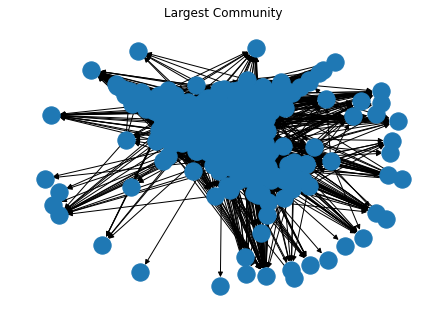

In [16]:
# Visualizing the largest community
selected_data = dict((n,d['community']) for n,d in graph.nodes().items() if d['community'] == largest_community)
sg=graph.subgraph(list(selected_data.keys()))
pos = nx.spring_layout(sg, seed=5656)
nx.draw(sg, pos=pos)
plt.title('Largest Community')
plt.show()

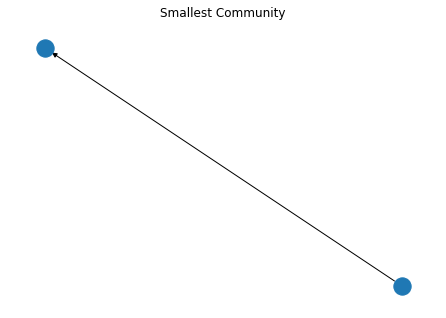

In [17]:
# Visualizing the smallest community
selected_data = dict((n,d['community']) for n,d in graph.nodes().items() if d['community'] == smallest_community)
sg=graph.subgraph(list(selected_data.keys()))
pos = nx.spring_layout(sg, seed=5656)
nx.draw(sg, pos=pos)
plt.title('Smallest Community')
plt.show()

The biggest group is the 5th one, clearly seen with many nodes in the graphs. Targeting this large community can reach a lot of nodes.

On the other hand, the smallest group is the 36th, containing only two nodes. To reach this community effectively, we need to increase the number of nodes associated with it.

#### 9. Select the largest three communities and draw them. After doing so, remove the top 3 nodes with the highest Degree Centrality, Closeness Centrality, Betweenness Centrality, and Eigenvector. Each should be in a separate plot/draw.

In [19]:
# Identify the largest three communities based on node counts
largest_three_communities = sorted(c, key = c.get, reverse = True)[:3]
print(f'largest three communities are {largest_three_communities}')

largest three communities are [5, 2, 3]


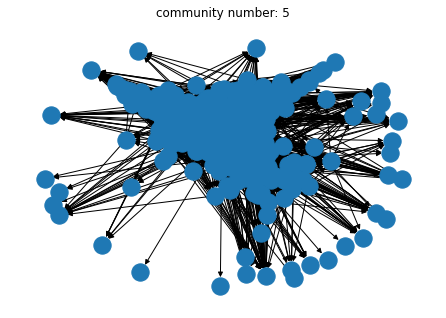

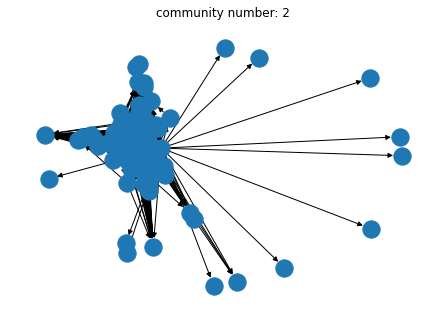

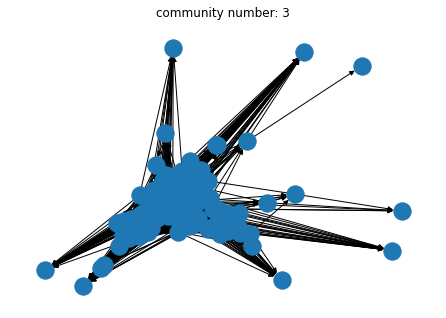

In [20]:
# Visualize the three largest communities in the graph
for community in largest_three_communities:
    selected_data = dict((n,d['community']) for n,d in graph.nodes().items() if d['community'] == community)
    sg=graph.subgraph(list(selected_data.keys()))
    pos = nx.spring_layout(sg, seed=5656)
    nx.draw(sg, pos=pos)
    plt.title(f'community number: {community}')
    plt.show()

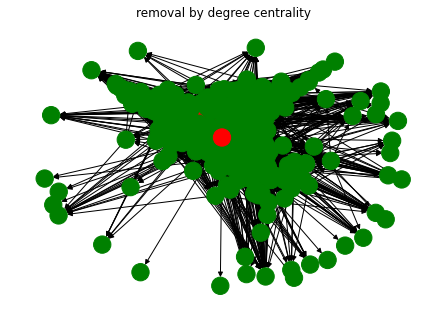

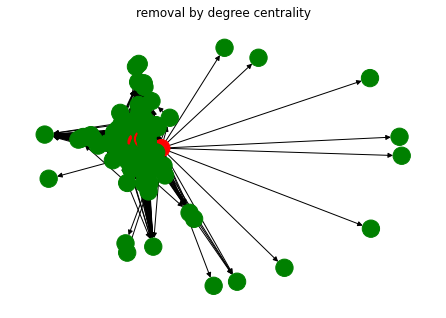

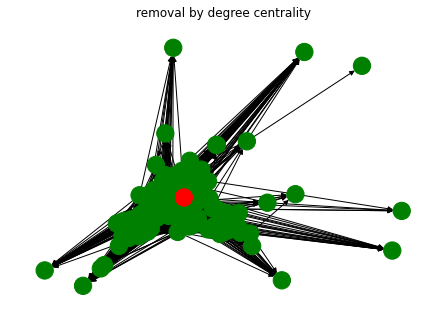

In [21]:
# Visualization for the removal by degree centrality
for community in largest_three_communities:
    selected_data = dict((n,d['community']) for n,d in graph.nodes().items() if d['community'] == community)
    sg=graph.subgraph(list(selected_data.keys()))
    degree_centrality = nx.degree_centrality(sg).items()
    nodes_to_delete = sorted(degree_centrality, key=lambda pair: -pair[1])[:3]
    nodes_to_delete = [i[0] for i in nodes_to_delete]
    all_influencers.extend(nodes_to_delete)
    color_map= ['red' if node in nodes_to_delete else 'green' for node in sg]
    pos = nx.spring_layout(sg, seed=5656)
    nx.draw(sg, pos=pos,node_color=color_map)
    plt.title(f'removal by degree centrality')
    plt.show()

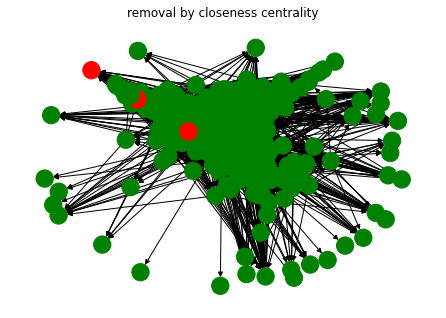

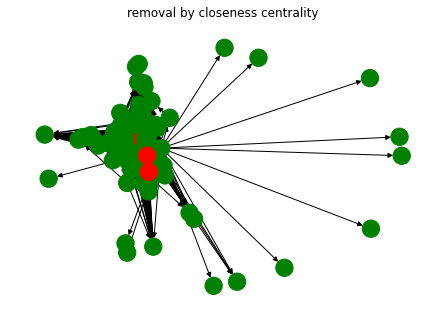

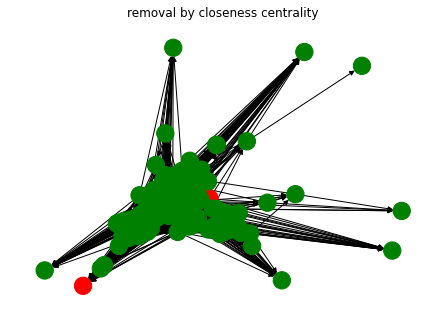

In [22]:
# Visualization for the removal by closeness centrality

for community in largest_three_communities:
    selected_data = dict((n,d['community']) for n,d in graph.nodes().items() if d['community'] == community)
    sg=graph.subgraph(list(selected_data.keys()))
    closeness_centrality = nx.closeness_centrality(sg).items()
    nodes_to_delete = sorted(closeness_centrality, key=lambda pair: -pair[1])[:3]
    nodes_to_delete = [i[0] for i in nodes_to_delete]
    all_influencers.extend(nodes_to_delete)
    color_map= ['red' if node in nodes_to_delete else 'green' for node in sg]
    pos = nx.spring_layout(sg, seed=5656)
    nx.draw(sg, pos=pos,node_color=color_map)
    plt.title(f'removal by closeness centrality')
    plt.show()

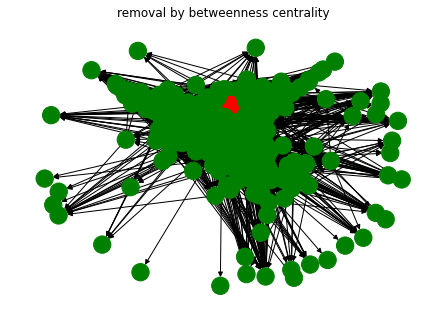

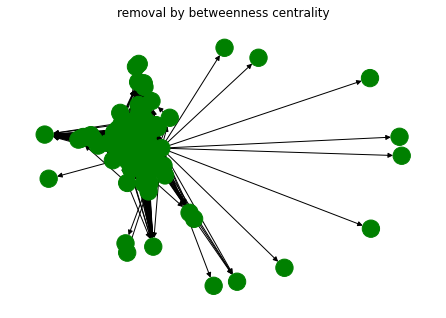

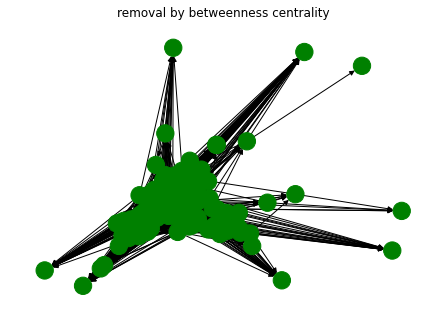

In [23]:
# Visualization for the removal by betweenness centrality
for community in largest_three_communities:
    selected_data = dict((n,d['community']) for n,d in graph.nodes().items() if d['community'] == community)   
    sg=graph.subgraph(list(selected_data.keys()))
    closeness_centrality = nx.centrality.betweenness_centrality(sg).items()
    nodes_to_delete = sorted(closeness_centrality, key=lambda pair: -pair[1])[:3]
    nodes_to_delete = [i[0] for i in nodes_to_delete]
    all_influencers.extend(nodes_to_delete)
    color_map= ['red' if node in nodes_to_delete else 'green' for node in sg]
    pos = nx.spring_layout(sg, seed=5656)
    nx.draw(sg, pos=pos,node_color=color_map)
    plt.title(f'removal by betweenness centrality')
    plt.show()

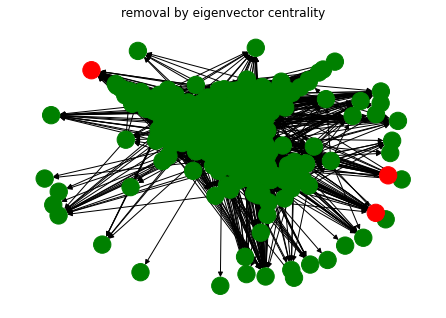

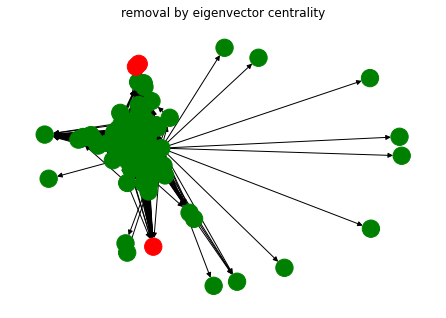

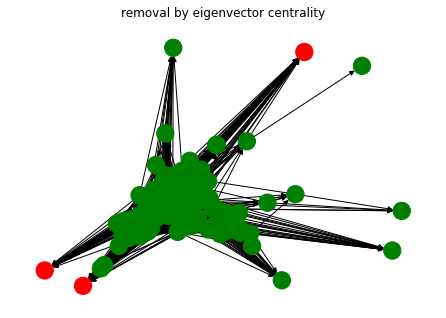

In [24]:
# Visualization for the removal by eigenvector centrality
for community in largest_three_communities:
    selected_data = dict((n,d['community']) for n,d in graph.nodes().items() if d['community'] == community)   
    sg=graph.subgraph(list(selected_data.keys()))
    eigenvector_centrality_ = nx.centrality.eigenvector_centrality(sg,max_iter = 1200)
    eigenvector_reversed = nx.centrality.eigenvector_centrality(sg.reverse(),max_iter = 1200)
    for node in eigenvector_centrality_.keys():
        eigenvector_centrality_[node] = (eigenvector_centrality_[node]+eigenvector_reversed[node])/2
    nodes_to_delete = sorted(eigenvector_centrality_, key=lambda pair: -pair)[:3]
    all_influencers.extend(nodes_to_delete)
    color_map= ['red' if node in nodes_to_delete else 'green' for node in sg]
    pos = nx.spring_layout(sg, seed=5656)
    nx.draw(sg, pos=pos,node_color=color_map)
    plt.title(f'removal by eigenvector centrality')
    plt.show()

#### 10. Draw the influencers of those top 3 communities.

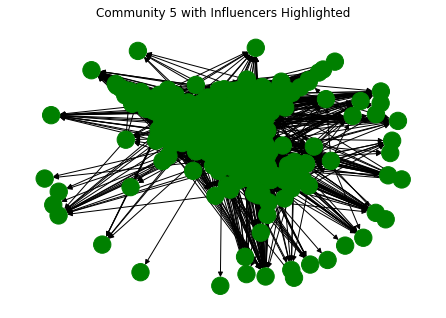

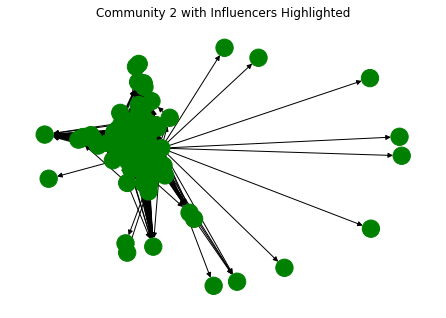

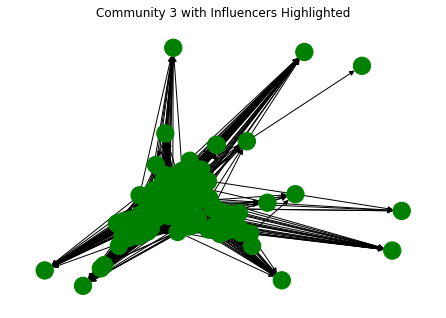

In [35]:
# Identify influencers based on the removal criteria
all_influencers = []
influencers = set(all_influencers)

# Visualize the influencers in the three largest communities
for community in largest_three_communities:
    selected_data = dict((n, d['community']) for n, d in graph.nodes().items() if d['community'] == community)
    sg = graph.subgraph(list(selected_data.keys()))
    
    # Highlight influencers in red
    color_map = ['red' if node in influencers else 'green' for node in sg]
    
    pos = nx.spring_layout(sg, seed=5656)
    nx.draw(sg, pos=pos, node_color=color_map)
    plt.title(f'Community {community} with Influencers Highlighted')
    plt.show()

#### 11. Design an action plan: 
a. Use hypothetical business (telecom, marketing agency, etc.) <br>
b. Use a hypothetical marketing budget <br>
c. Use a hypothetical cost per action (advertisement cost) <br>
d. Decide whom should you target? 

Let's take a small telecom company as a hypothetical business. The hypothetical marketing budget is $50,000, and the hypothetical cost per action is $0.2 per second. For the target audience, we will increase brand awareness within large social network groups and target influencers of these groups. Identifying influencers within the top large social network groups will bring us more profit. Subsequently, we plan to initiate interactions with these identified influencers, monitor brand mentions and interactions, and assess the impact of influencer engagement. The calculated cost per computation will be $0.2 * (1 / 3600), where 3600 is the number of seconds in an hour. By centering our efforts on social network advertising to identify influencers within substantial groups, our aim is to adjust the telecom company's marketing budget, strategically using influencers to increase brand awareness.